 ![image info](https://th.bing.com/th/id/OIP.zebRpAIqbDv0MS43zo7ZbQHaE8?pid=ImgDet&rs=1)

##### We will use pima indian diabetes dataset to predict if a person has a diabetes or not based on certain features such as blood pressure, skin thickness, age etc.

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings


warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:


df = pd.read_csv("pima-indians-diabetes.csv", names=['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'],header=None)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Checking the null values

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### We got zero null value

#### Statistical Analysis

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Checking the distribution of the dataset

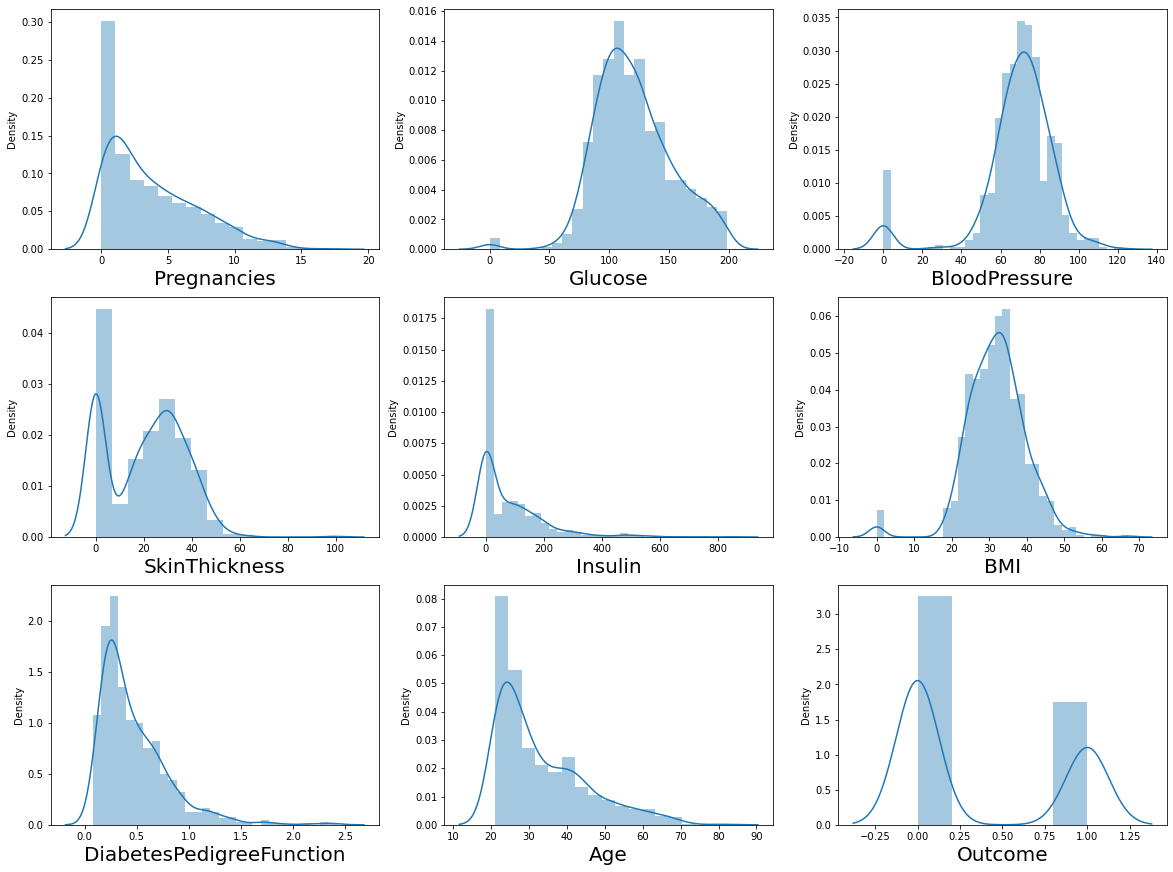

In [5]:
plt.figure(figsize=(20,15),facecolor='white')
plot_num = 1

for column in df:
    if plot_num <= 9:     # number of columns is 9
        ax = plt.subplot(3,3,plot_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_num+=1
plt.show()
    

#### We can see there is some skewness in the data . Also , we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter. 

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# replacing zero values with the mean of the column

df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

#### Distribution of data after replacing zero values with mean 

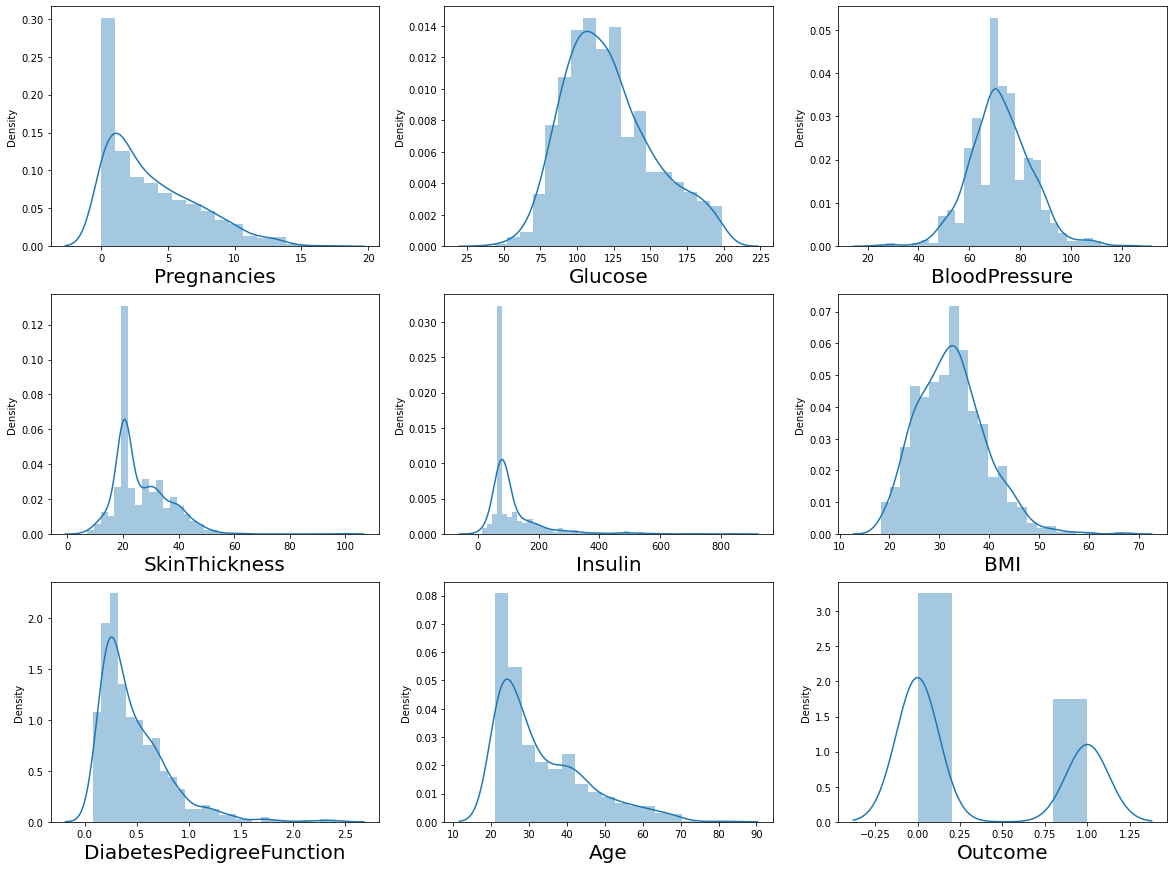

In [8]:
plt.figure(figsize=(20,15),facecolor='white')
plot_num = 1

for column in df:
    if plot_num <= 9:     # number of columns is 9
        ax = plt.subplot(3,3,plot_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plot_num+=1
plt.show()
    

#### So we deal with zero values. But there are some outliers in the dataset 

<AxesSubplot:>

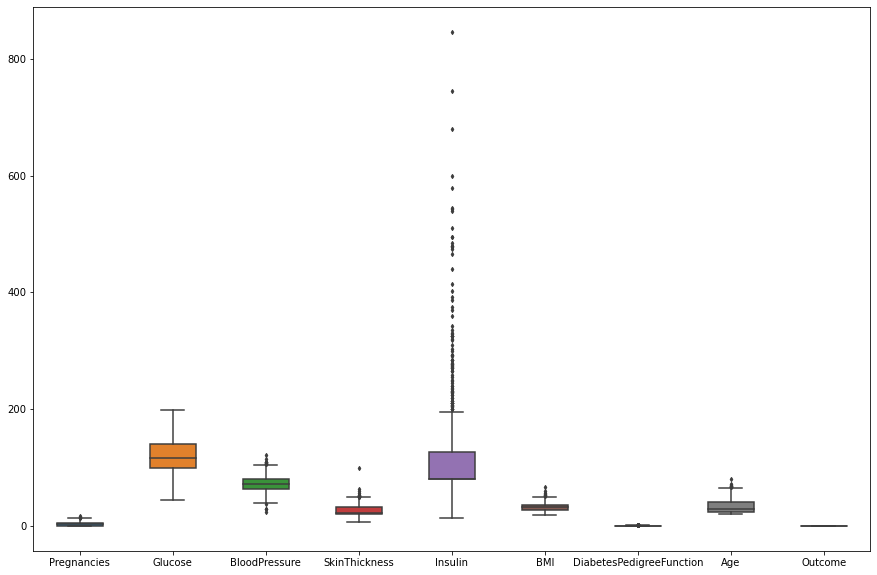

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)


#### Removing some amount of outliers from the dataset

In [10]:
q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
df_cleaned = df[df['Pregnancies']<q]

q = df_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
df_cleaned  = df_cleaned[df_cleaned['BMI']<q]

q = df_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
df_cleaned  = df_cleaned[df_cleaned['SkinThickness']<q]

q = df_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
df_cleaned  = df_cleaned[df_cleaned['Insulin']<q]

q = df_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
df_cleaned  = df_cleaned[df_cleaned['DiabetesPedigreeFunction']<q]

q = df_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
df_cleaned  = df_cleaned[df_cleaned['Age']<q]

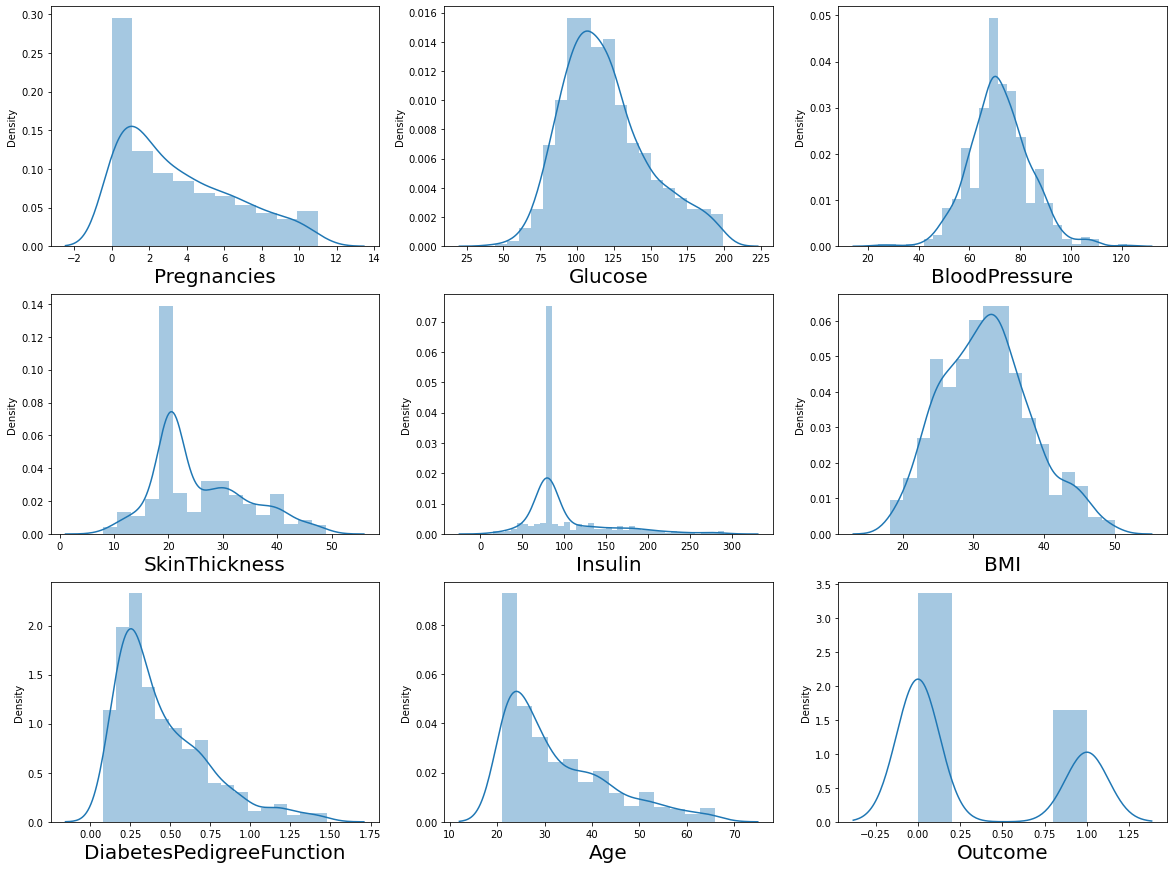

In [11]:
### Checking distribution of data after removing some amount of outliers

plt.figure(figsize=(20,15),facecolor='white')
plot_num = 1

for column in df_cleaned:
    if plot_num <= 9:     # number of columns is 9
        ax = plt.subplot(3,3,plot_num)
        sns.distplot(df_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plot_num+=1
plt.show()
    

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

#### Creaing Dependent and Independent Variable 

In [12]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

#### Visualization the relationship between our independent variables and the categories.

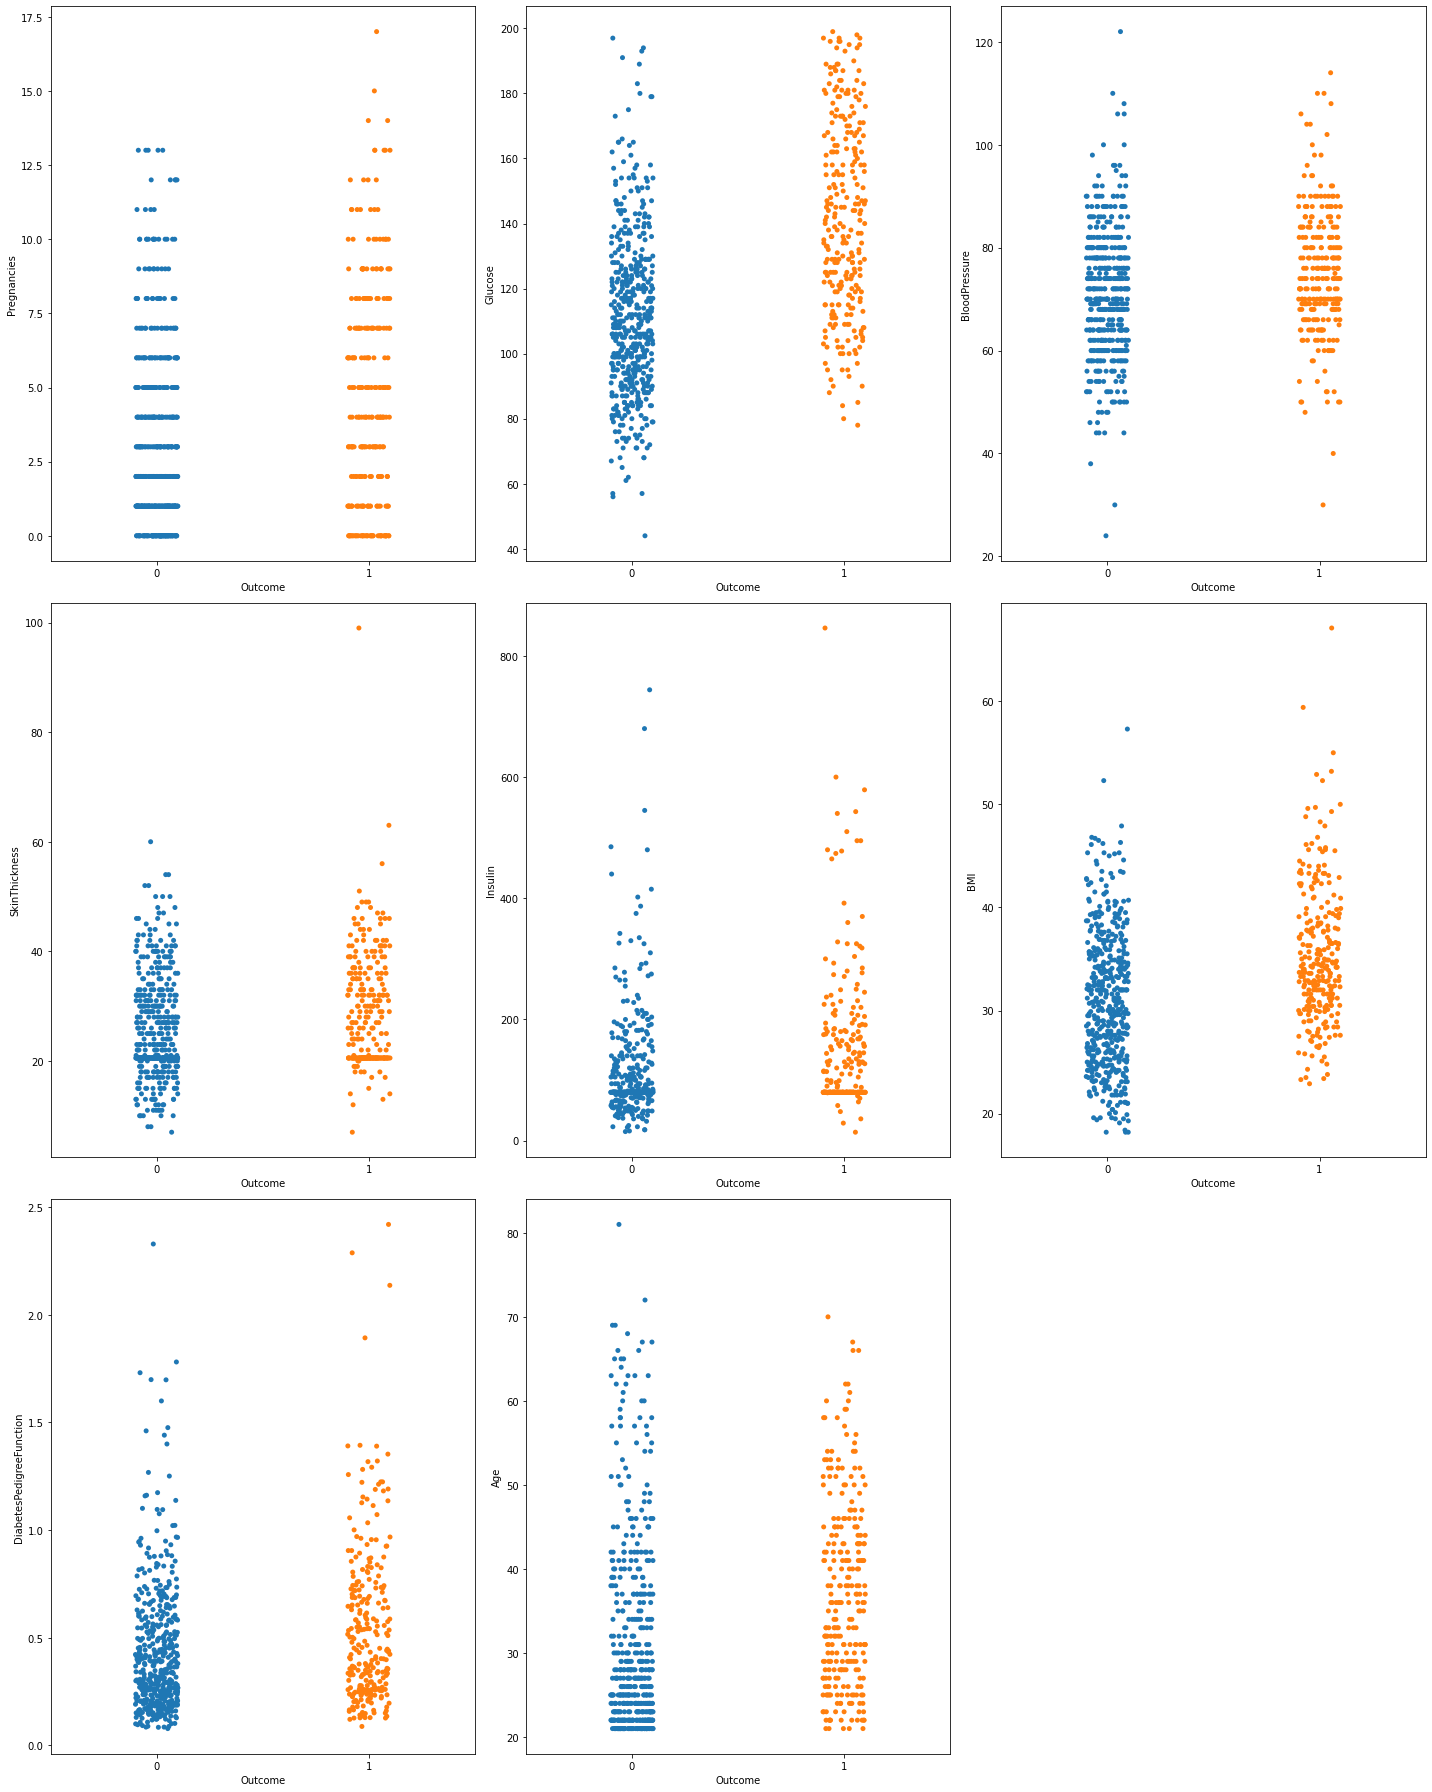

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plot_num = 1

for column in X:
    if plot_num<=9 :
        ax = plt.subplot(3,3,plot_num)
        sns.stripplot(y,X[column])
    plot_num+=1
plt.tight_layout()

In [14]:
### Importing the Libraries for training the Dataset

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

### Scaling the data

In [15]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [16]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

#### Checking for multicollinearity using VIF(Variance Inflation factor)

In [17]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


#### All the VIF values are less than 5 and are very low. That means no multicollinearity.

### Train Test Split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

### Implementing Logistic Regression

In [19]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred = log_reg.predict(x_test)

In [21]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7552083333333334

In [22]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [23]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

True Positive(TP): A result that was predicted as positive by the classification model and also is positive

 True Negative(TN): A result that was predicted as negative by the classification model and also is negative

 False Positive(FP): A result that was predicted as positive by the classification model but actually is negative

 False Negative(FN): A result that was predicted as negative by the classification model but actually is positive.

In [24]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7552083333333334

Accuracy
The mathematical formula is :

Accuracy=  (𝑇𝑃+𝑇𝑁)(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁) 
Or, it can be said that it’s defined as the total number of correct classifications divided by the total number of classifications.

In [25]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.88

Precision
Precision is a measure of amongst all the positive predictions, how many of them were actually positive. Mathematically,

Precision= 𝑇𝑃(𝑇𝑃+𝐹𝑃) 
Let’s suppose in the previous example, the model identified 50 people as cancer patients(TP) but also raised a false alarm for 100 patients(FP). Hence,

Precision= 50(50+100) =0.33 (The model only has a precision of 33%)

In [26]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7746478873239436

Recall or Sensitivity
The mathematical formula is:

Recall=  𝑇𝑃(𝑇𝑃+𝐹𝑁) 
Or, as the name suggests, it is a measure of: from the total number of positive results how many positives were correctly predicted by the model.

It shows how relevant the model is, in terms of positive results only.

Let’s suppose in the previous model, the model gave 50 correct predictions(TP) but failed to identify 200 cancer patients(FN). Recall in that case will be:

Recall= 50(50+200) = 0.2 (The model was able to recall only 20% of the cancer patients)

In [27]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8239700374531835

we need a metric that considers both Precision and Recall for evaluating a model. One such metric is the F1 score.

F1 score is defined as the harmonic mean of Precision and Recall.

The mathematical formula is: F1 score=  2∗((𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛∗𝑅𝑒𝑐𝑎𝑙𝑙)(𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛+𝑅𝑒𝑐𝑎𝑙𝑙))

In [28]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7011940298507463

AUC(Area Under Curve)

It helps us to choose the best model amongst the models for which we have plotted the ROC curves
The best model is the one which encompasses the maximum area under it.
In the adjacent diagram, amongst the two curves, the model that resulted in the red one should be chosen as it clearly covers more area than the blue one

### ROC

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

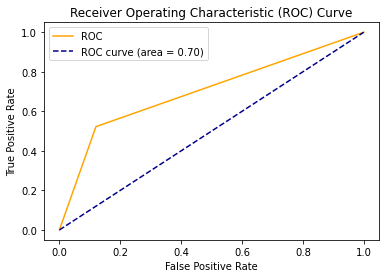

In [30]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### By Implementing Logistic Regression ---- We got Accuracy Score of 75%

### Support Vector Classification Model Implementation

In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [32]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [33]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [37]:
cm

array([[113,  19],
       [ 22,  38]], dtype=int64)

In [38]:
accuracy=accuracy_score(y_test,y_pred)

In [39]:
accuracy

0.7864583333333334

#### By Implementing Support Vector Classification model -- we got accuracy score of 78.64%

### Decision Tree Classification Model 

In [40]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [41]:
X = df.drop('Outcome',axis = 'columns')
y = df.Outcome

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

In [44]:
X_train.shape

(576, 8)

In [45]:
X_test.shape

(192, 8)

In [46]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [47]:
y_test.value_counts()

0    125
1     67
Name: Outcome, dtype: int64

In [48]:

from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.4902626811594203, 0.9615384615384616, 'X[1] <= 0.191\ngini = 0.454\nsamples = 576\nvalue = [375, 201]'),
 Text(0.1964070048309179, 0.8846153846153846, 'X[7] <= -0.403\ngini = 0.317\nsamples = 360\nvalue = [289, 71]'),
 Text(0.06038647342995169, 0.8076923076923077, 'X[5] <= -0.029\ngini = 0.134\nsamples = 207\nvalue = [192, 15]'),
 Text(0.01932367149758454, 0.7307692307692307, 'X[3] <= 0.301\ngini = 0.016\nsamples = 121\nvalue = [120, 1]'),
 Text(0.00966183574879227, 0.6538461538461539, 'gini = 0.0\nsamples = 113\nvalue = [113, 0]'),
 Text(0.028985507246376812, 0.6538461538461539, 'X[2] <= 0.062\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.01932367149758454, 0.5769230769230769, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.03864734299516908, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10144927536231885, 0.7307692307692307, 'X[6] <= 0.053\ngini = 0.273\nsamples = 86\nvalue = [72, 14]'),
 Text(0.06763285024154589, 0.6538461538461539, 'X[5

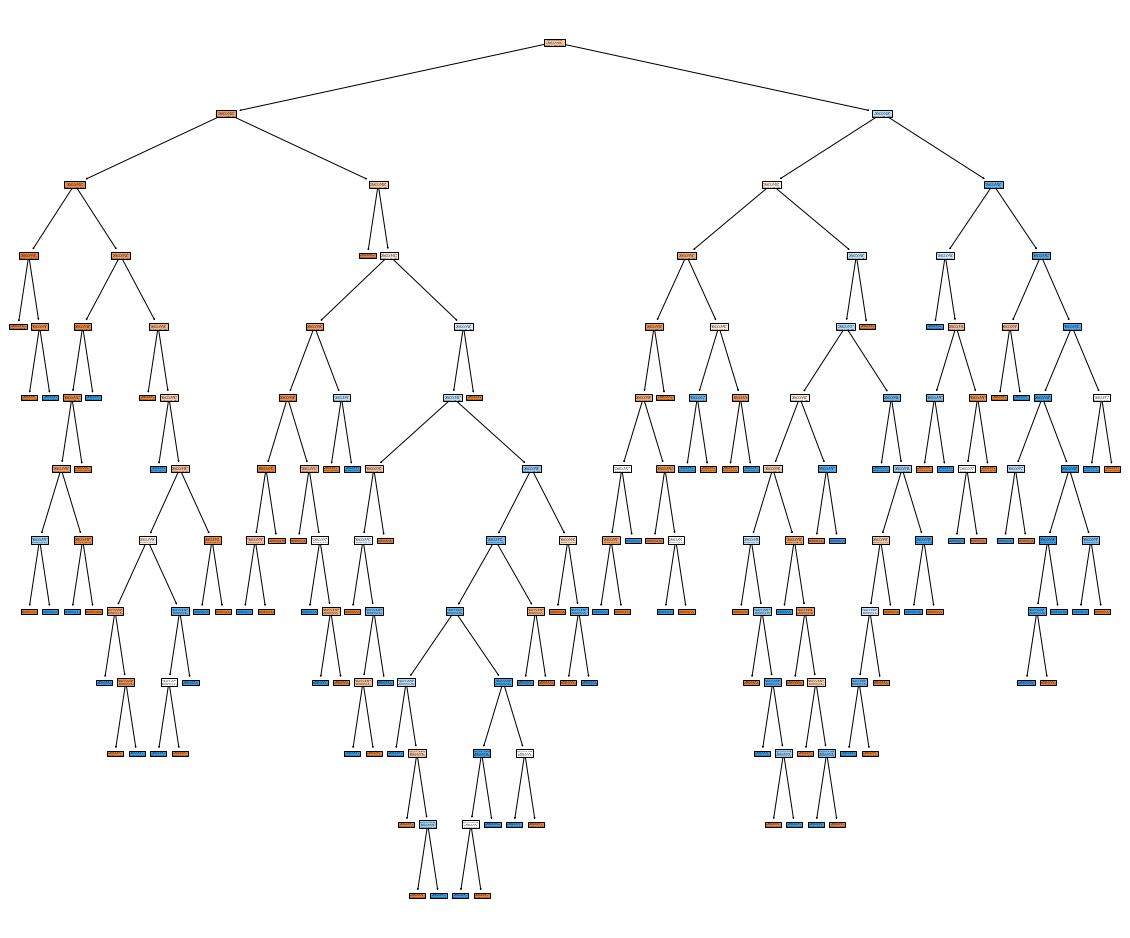

In [49]:
from sklearn import tree
plt.figure(figsize=(20,17))
tree.plot_tree(treemodel,filled=True)

In [50]:
y_pred = treemodel.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score,classification_report

In [52]:
score=accuracy_score(y_pred,y_test)
print(score)

0.7552083333333334


In [53]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.84      0.80       116
           1       0.72      0.63      0.67        76

    accuracy                           0.76       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.75      0.76      0.75       192



#### By Implementing Decision Tree Model -- we got Accuracy Score of 75.52%

### Bagging Classifier Model 

In [64]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,  ##oob - out of bag
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.7586805555555556

In [65]:
bag_model.score(X_test, y_test)

0.7916666666666666

In [67]:
from sklearn.model_selection import cross_val_score
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X, y, cv=5)
scores

array([0.73376623, 0.73376623, 0.75324675, 0.83006536, 0.73202614])

In [68]:
scores.mean()

0.756574144809439

#### Bagging Classifier Model gives the Accuracy score of 75.65%

### Random Forest Classification 

In [69]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=50)

score=cross_val_score(randomforest_classifier,X,y,cv=50)
score.mean()

0.7534166666666665

#### Hyperparameter Tuining Grid Search CV 

In [70]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', 'auto'],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}




1) n_estimator is the hyperparameter that defines the number of trees to be used in the model.

2) max_depth determines the maximum number of splits each tree can take. If the max_depth is too low,
   the model will be trained less and have a high bias, leading the model to underfit. In the same      way if the max_depth is high, the model learns too much and leads to high variance, leading the      model to overfit.

3)  Max_features limits a count to select the maximum features in each tree. 

4) each tree is used to split into multiple nodes. But how many divisions of nodes should be done is specified by max_lead_nodes. max_leaf_nodes restricts the growth of each tree. 

In [71]:
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV

In [72]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)


#### Updating the model with the parameters got from grid search cv 

In [73]:
model_grid = RandomForestClassifier(max_depth=6,
                                    max_features="log2",
                                    max_leaf_nodes=9,
                                    n_estimators=25)
model_grid.fit(X_train, y_train)
y_pred_grid = model_grid.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       132
           1       0.67      0.75      0.71        60

    accuracy                           0.81       192
   macro avg       0.78      0.79      0.78       192
weighted avg       0.81      0.81      0.81       192



In [74]:
score=accuracy_score(y_pred_grid,y_test)
print(score)

0.8072916666666666


### Randomized Search CV

In [75]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=6)


#### update the parameters of the model by those which are obtained by using RandomizedSearchCV.

In [76]:
model_random = RandomForestClassifier(max_depth=9,
                                      max_features='auto',
                                      max_leaf_nodes=9,
                                      n_estimators=50)
model_random.fit(X_train, y_train)
y_pred_rand = model_random.predict(X_test)
print(classification_report(y_pred_rand, y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       138
           1       0.63      0.78      0.69        54

    accuracy                           0.81       192
   macro avg       0.77      0.80      0.78       192
weighted avg       0.83      0.81      0.81       192



In [77]:
score=accuracy_score(y_pred_rand,y_test)
print(score)

0.8072916666666666


#### Random Forest Model gives 80% of Accuracy 

### We can say that Random Forest gives the best Accuracy score